<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Discrete-Time Signal
- 이번 실습에서는 파이썬을 이용하여 discrete-time signal을 다루어보는 연습을 하겠습니다.
- 우리는 유한한 샘플에 대해 디스플레이를 할 수 있으므로, -N부터 N까지의 정수 index n을 정의하겠습니다.

In [2]:

N = 10
n = np.arange(-N, N+1)
print(n)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


- 간단한 discrete-time signal x[n] 을 정의하여 stem함수를 이용하여 시각화해봅니다.


In [3]:
def mysig(n):
  x = 7 - np.abs(n)
  x[n>=0] = 7
  x[np.abs(n)>5] = 0
  return x


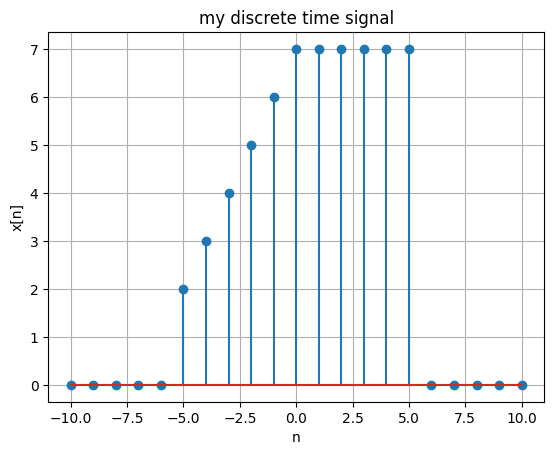

In [4]:
x = mysig(n)
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('my discrete time signal')
plt.grid('on')
plt.show()

## Elementary Signal Transformation
- 정의한 신호들에 대해 time shift, time scaling, time reversal 등을 진행해봅니다.

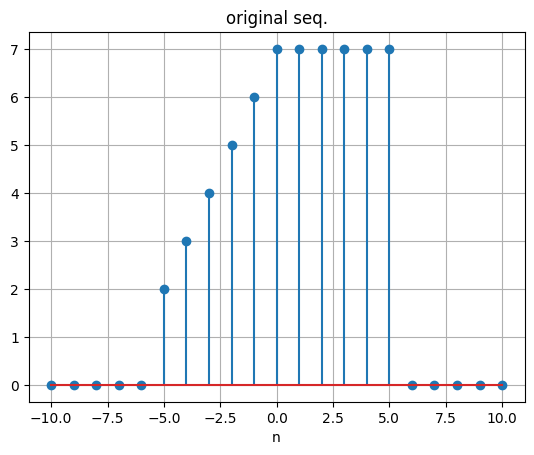

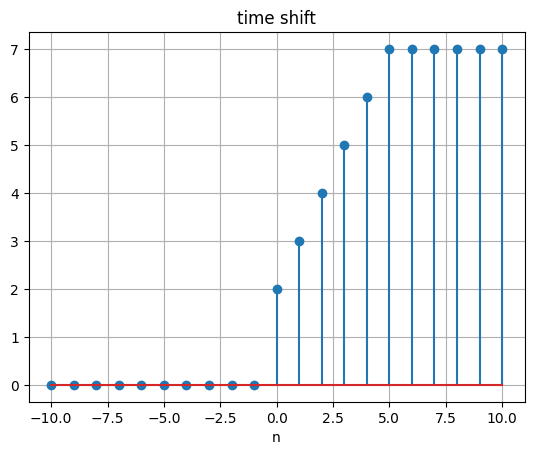

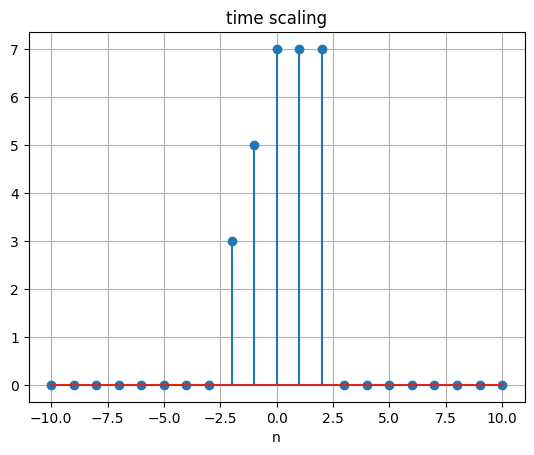

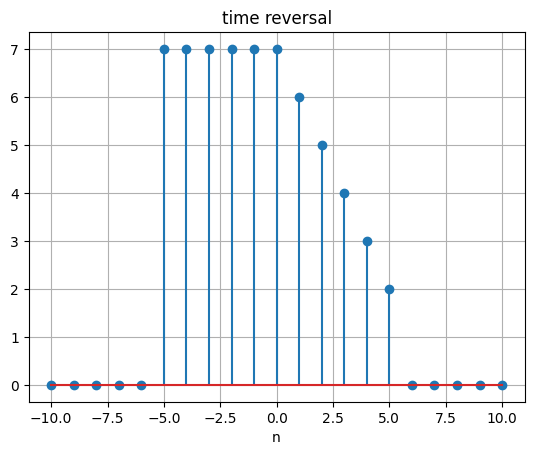

In [5]:
plt.stem(n,mysig(n))
plt.xlabel('n')
plt.title('original seq.')
plt.grid('on')
plt.show()

plt.stem(n,mysig(n-5))
plt.xlabel('n')
plt.title('time shift')
plt.grid('on')
plt.show()

plt.stem(n,mysig(2*n))
plt.xlabel('n')
plt.title('time scaling')
plt.grid('on')
plt.show()

plt.stem(n,mysig(-n))
plt.xlabel('n')
plt.title('time reversal')
plt.grid('on')
plt.show()

- time shift, scaling, reversal을 혼합하여 신호를 시각화해봅니다.


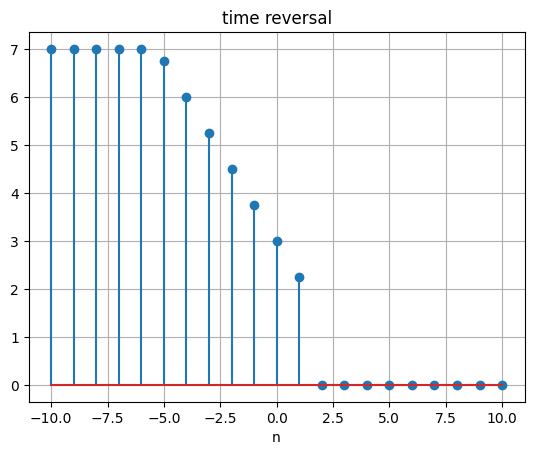

In [6]:

plt.stem(n,mysig(-0.75*n-4))
plt.xlabel('n')
plt.title('time reversal')
plt.grid('on')
plt.show()

- 정의한 신호를 even function과 odd function으로 나누어 봅니다.

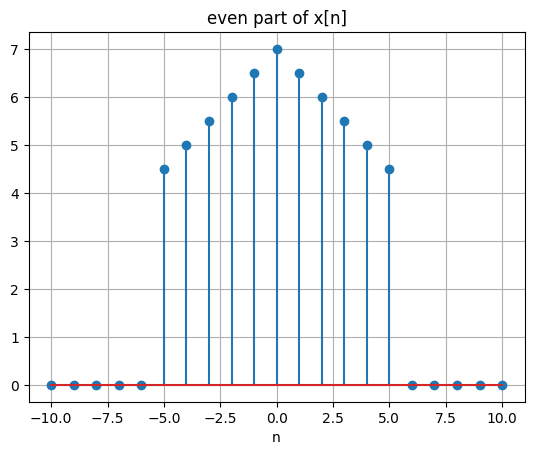

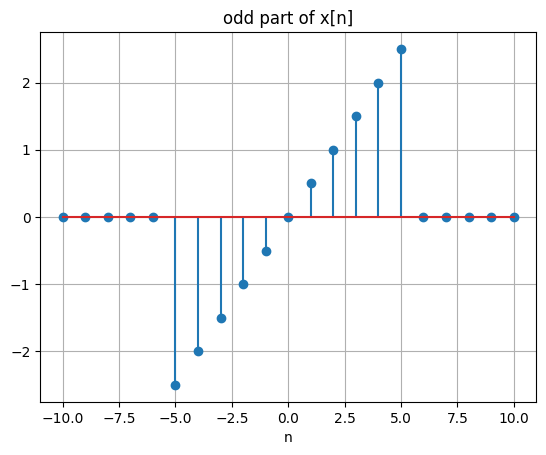

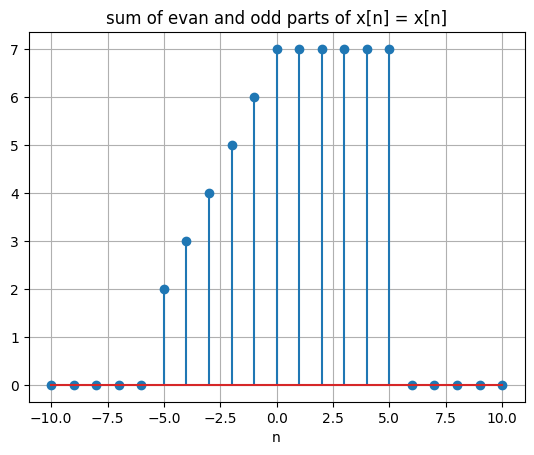

In [7]:
xe = 0.5 * (mysig(n) + mysig(-n))
xo = 0.5 * (mysig(n) - mysig(-n))

plt.stem(n,xe)
plt.xlabel('n')
plt.title('even part of x[n]')
plt.grid('on')
plt.show()

plt.stem(n,xo)
plt.xlabel('n')
plt.title('odd part of x[n]')
plt.grid('on')
plt.show()

plt.stem(n,xe + xo)
plt.xlabel('n')
plt.title('sum of evan and odd parts of x[n] = x[n]')
plt.grid('on')
plt.show()

# 음성신호에 적용해보기

In [8]:
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio

In [9]:
fs, d = wavfile.read('cy.wav')
print(f"sampling rate: {fs} Hz")
print(f"shape of data: {d.shape}")

sampling rate: 48000 Hz
shape of data: (367232, 2)


duration of data: 7.650666666666667 s
samples of data: 367232 samples


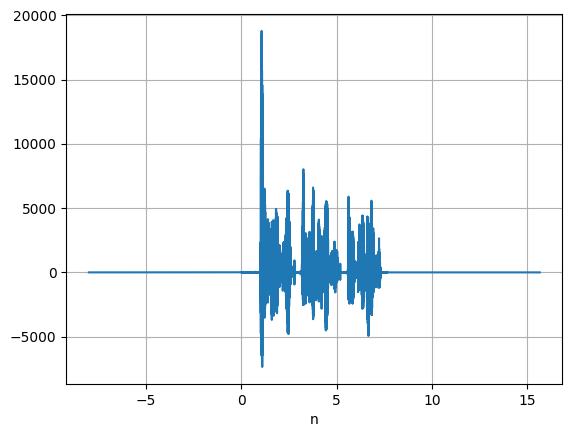

In [10]:
if len(d.shape)==2:
    mywav = np.array(d[:,0])
elif len(d.shape)==1:
    mywav = np.array(d)

L = len(d)
print(f"duration of data: {L/fs} s")
print(f"samples of data: {L} samples")

pad_sec = int(np.ceil(L/fs))
pt = fs*pad_sec
mywav_pad =np.pad(mywav,(pt,pt),'constant', constant_values=(0, 0))
t = np.arange(0,len(mywav))/fs
t_ = np.arange(0,len(mywav_pad))/fs - pad_sec

plt.plot(t_,mywav_pad)
plt.xlabel('n')
plt.grid('on')
plt.show()
Audio(mywav*t,rate=fs)

## Time Shift

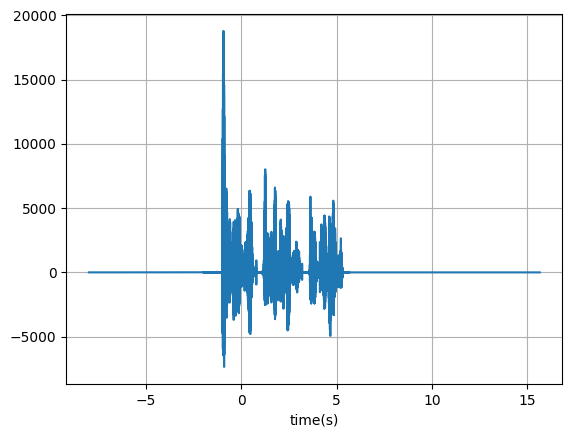

In [11]:
t0 = -2
a = int((t0) * fs)
mywav1_ = np.roll(mywav_pad, a)
t1_ = t_
plt.plot(t1_,mywav1_)
plt.xlabel('time(s)')
plt.grid('on')
plt.show()
mywav1 = mywav1_[pt:-pt]
t1 = t1_[pt:-pt]
Audio(mywav1,rate=fs)

## Time Reversal

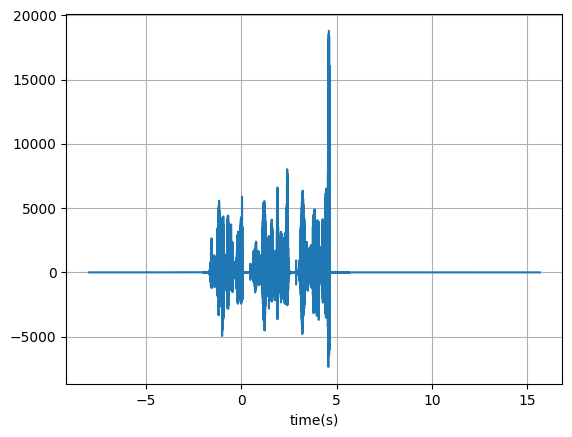

In [12]:
t0 = -2
a = int((t0) * fs)
mywav2_ = np.roll(mywav_pad[::-1], a)#[pt:-pt]
#mywav2_ = np.roll(mywav_pad, a)[::-1]#[pt:-pt]
t2_ = t_#[pt:-pt]
plt.plot(t2_,mywav2_)
plt.xlabel('time(s)')
plt.grid('on')
plt.show()
mywav2 = mywav2_[pt:-pt]
t2 = t2_[pt:-pt]
Audio(mywav2,rate=fs)

## Time Scaling

In [13]:
scale_factor = 0.5
Audio(mywav1,rate=(fs*scale_factor))

## Even part of signal

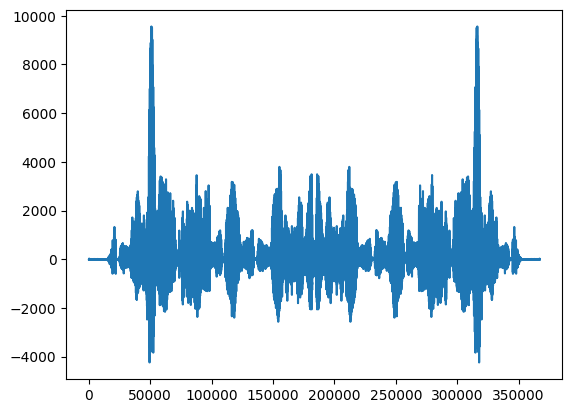

In [14]:
even_sig = (0.5)*(mywav+mywav[::-1])
plt.plot(even_sig)
Audio(even_sig,rate=fs)

## Odd part of signal

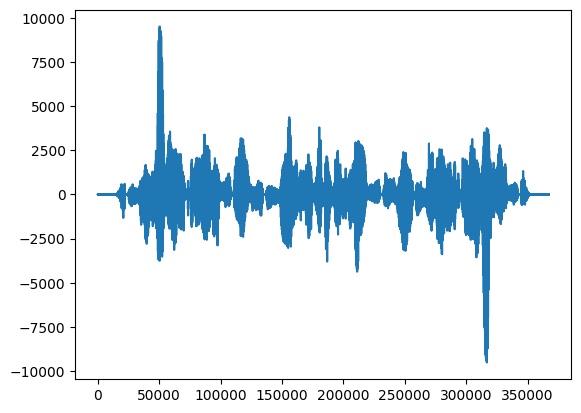

In [15]:
odd_sig = (0.5)*(mywav-mywav[::-1])
plt.plot(odd_sig)
Audio(odd_sig,rate=fs)

## Even part + Odd part

In [16]:
Audio(odd_sig+even_sig,rate=fs)

## 사인/코사인신호는 서로 다른 주파수에 대해 어떻게 들릴까?

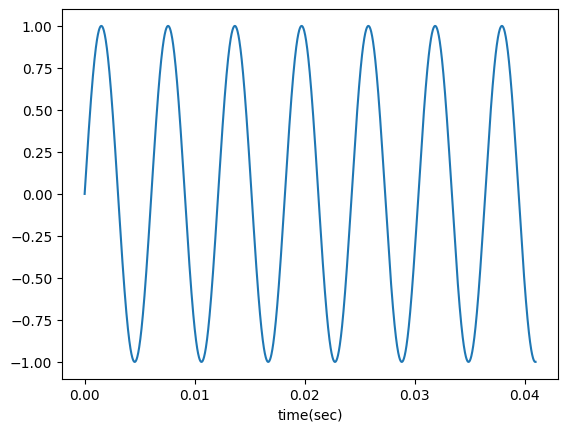

In [21]:
t1s = np.arange(0,1*fs)/fs
freq = 164.81

# 130.81, 146.83, 164.81, 174.61, 196.00, 220.00, 246.94
# 261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88
# 523.25, 587.33, 659.26, 698.46, 783.99, 880.00, 987.77

mycos = np.sin(2*np.pi*freq*t1s)
plt.plot(t[:int(freq)*12],mycos[:int(freq)*12])
plt.xlabel('time(sec)')
plt.show()
Audio(mycos,rate=fs)